## Project: Estimating Crop Yield Based on Weather & Soil Conditions (Linear Regression)

## 📌 Problem Statement  

- You need to **predict the crop yield (in tons per hectare)** based on various factors such as: rainfall, temperature, soil type, and other agricultural parameters. 
  
- The goal is to help farmers optimize their crop production by analyzing historical data and providing yield predictions based on current conditions.


## 🎯 Objective of the Project: Crop Yield Prediction using Linear Regression  

The primary objective of this project is to develop a **predictive model** that estimates the **crop yield (tons per hectare)** based on various **agricultural and environmental factors**, including:  

- 🌧 **Rainfall**  
- 🌡 **Temperature**  
- 🌱 **Soil Type**  
- 💊 **Fertilizer Usage**  
- 🌾 **Crop Type**  
- 🌍 **Other Climatic and Soil Conditions**  


### 🎯 Key Goals of the Model

#### 1️⃣ Optimize Crop Production  
- Help farmers estimate expected yield based on past data and current conditions.

#### 2️⃣ Improve Decision-Making  
- Assist agricultural stakeholders (farmers, policymakers, agronomists) in resource allocation, such as selecting the right crop for a given season and region.

#### 3️⃣ Mitigate Risks Due to Climate Change  
- By analyzing historical patterns, farmers can adapt better to changing weather conditions and improve food security.

#### 4️⃣ Enable Smart Farming  
- Integrate predictive analytics with precision agriculture to reduce crop losses and increase productivity.


### Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

### Create a dataframe named "crop_df" from the given datafile and print it's head

In [266]:
crop_df = pd.read_csv(r"C:\imarticus study\Projects\projects rithik raj\Linear Regression\crop_yield.csv")

In [267]:
crop_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


#### Observation:

* Crop: Type of crop

* Crop_Year: Year of cultivation

* Season: Season in which crop was grown

* State: Indian state

* Area: Area of land used

* Production: Total crop production

* Annual_Rainfall: Rainfall received annually

* Fertilizer: Quantity of fertilizer used

* Pesticide: Quantity of pesticide used

* Yield: (Target) Crop yield (production per area)



### Check Data Types, Dimensions, and Summary

In [269]:
# Check the number of rows and columns
print("Dataset Dimensions:", crop_df.shape)

Dataset Dimensions: (19689, 10)


#### Observation: The shape gives the number of rows & columns.

- Dataset Dimensions:- The dataset contains 19,689 rows and 10 columns.
- It’s a large dataset, which is good for training an ML model.

In [271]:
# Check data type of each column
print("Data Types:\n", crop_df.dtypes)

Data Types:
 Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


#### Observation: Data types help us understand which features are numerical or categorical.

- Categorical Columns:- Crop, Season, State
- Numerical Columns:- Crop_Year, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, Yield
- The dataset has a mix of categorical and numerical variables, meaning encoding may be required for ML models.

### Check for missing values

In [274]:
print("\nMissing Values in Each Column:\n")
print(crop_df.isnull().sum())


Missing Values in Each Column:

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


### Check Summary of Dataset

In [276]:
# Dataset overview
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


#### Observations: Dataset Overview
1. Total Records:
The dataset contains 19,689 entries, indexed from 0 to 19,688.

2. Total Columns:
There are 10 columns, covering aspects like crop details, environmental factors, and production metrics.

3. Data Types:

* object (3): Crop, Season, State

* int64 (2): Crop_Year, Production

* float64 (5): Area, Annual_Rainfall, Fertilizer, Pesticide, Yield

4. No Missing Values:
All columns have 19,689 non-null values, indicating a clean dataset with no missing entries.

5. Memory Usage:
Approximately 1.5 MB — manageable size for most systems.

6. Ready for Analysis:
Since the dataset is clean with proper data types and no null values, it is well-prepared for EDA, visualization, and model training.



In [278]:
# Descriptive statistics of numerical columns
crop_df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


#### Observation: Descriptive statistics help us find:
* Mean, median, and standard deviation of numerical columns.

* Min/max values to detect outliers.

🔹 Crop_Year (1997-2020)

- Data spans from 1997 to 2020, providing historical agricultural trends.

🔹 Area (Land used for crops, min = 0.5, max = 50.8M hectares)

- Large variance between small-scale and large-scale farming.

- Outliers might exist (some values may be unrealistic).

🔹 Production (Total crop production, min = 0, max = 6.32B tons)

- There are cases where Production = 0, which should be examined.

- High standard deviation suggests significant variation in crop production.

🔹 Annual Rainfall (301mm - 6552mm)

- The range suggests data from both dry and high-rainfall regions.

- High max value (6552mm) could indicate outliers.

🔹 Fertilizer Usage (min = 54, max = 4.8B tons)

- Some very high values (possible outliers).

- Data needs to be log-transformed to reduce skewness.

🔹 Pesticide Usage (min = 0.09, max = 15.7M tons)

- Possible skewness with extreme values.

- Might need to scale the data for better model performance.

🔹 Yield (Target Variable, min = 0, max = 21,105 tons per hectare)

- High variation, indicating different productivity levels across regions and crops.

- Some extreme values could affect model predictions.



## Performing EDA(Exploratory Data Analysis.)

### Boxplots to Detect Outliers

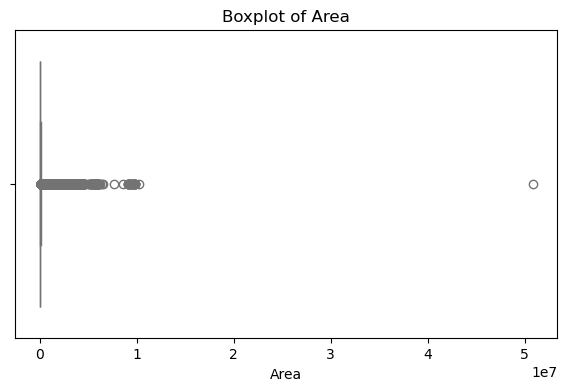

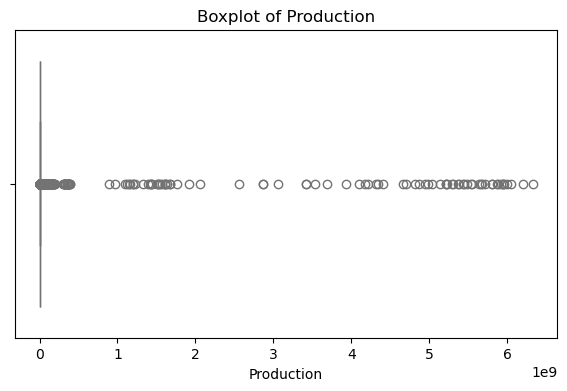

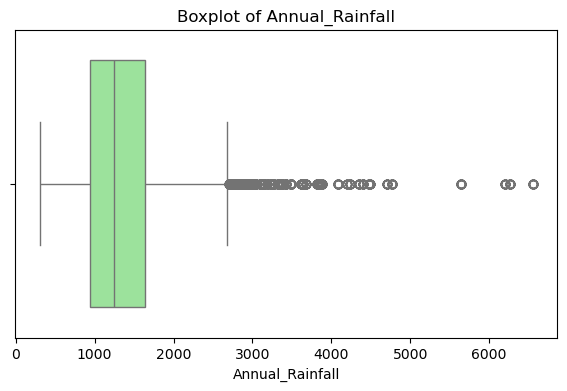

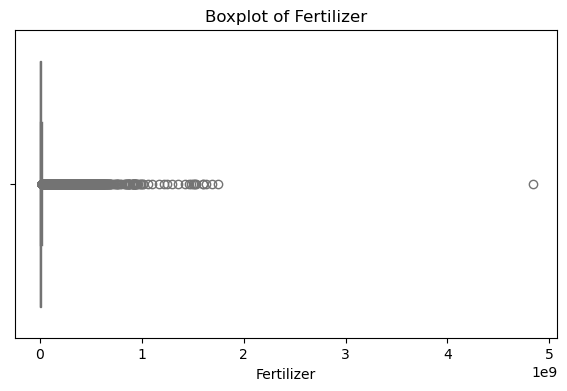

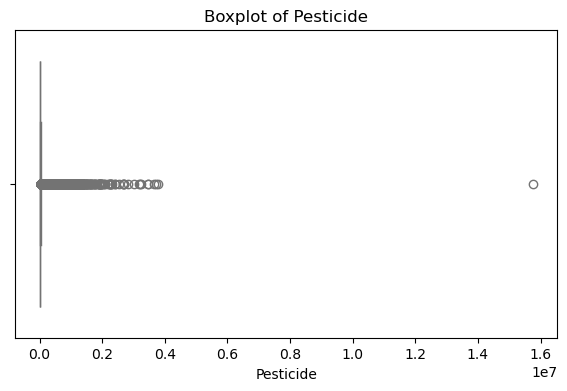

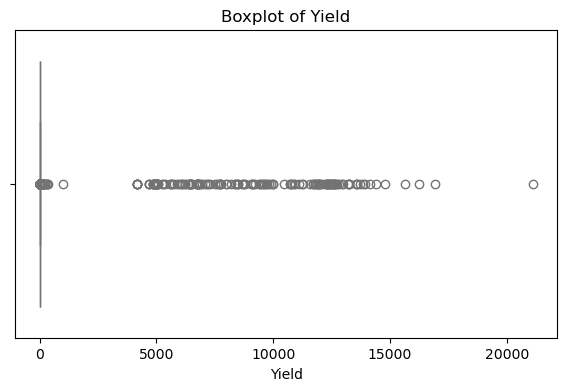

In [282]:
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=crop_df, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()


### Distribution Plots for Numerical Features

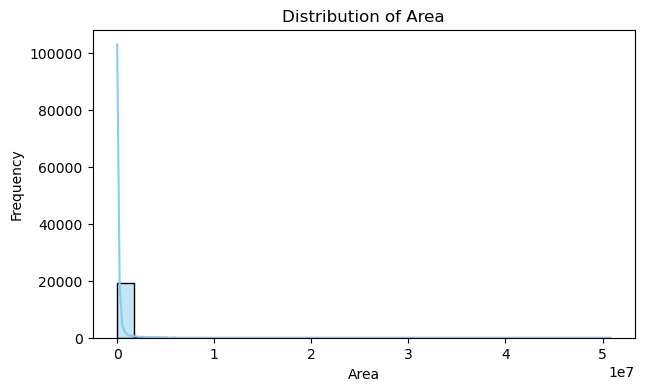

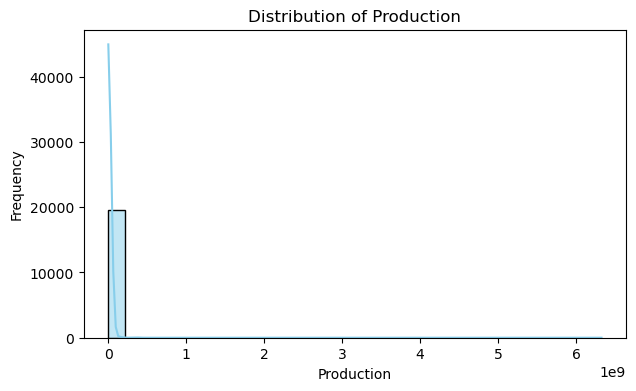

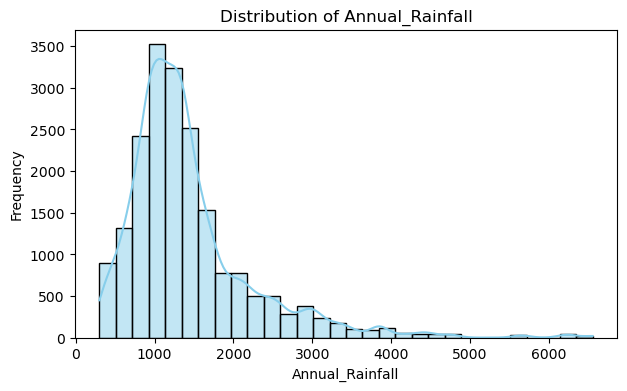

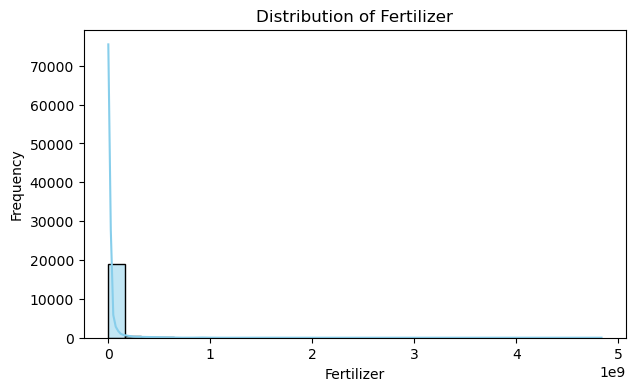

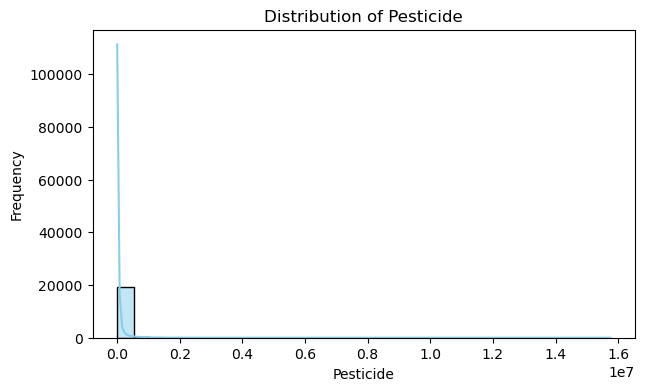

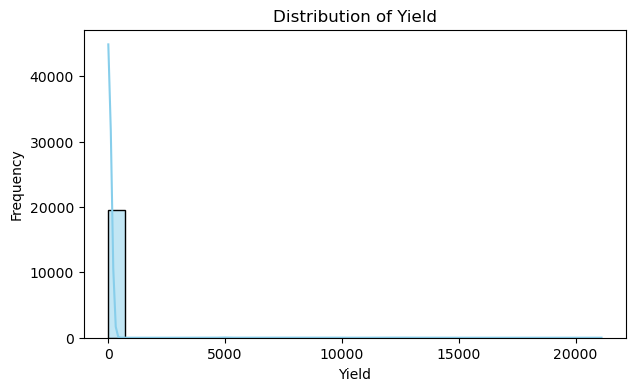

In [284]:
num_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(crop_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Crop-wise Yield

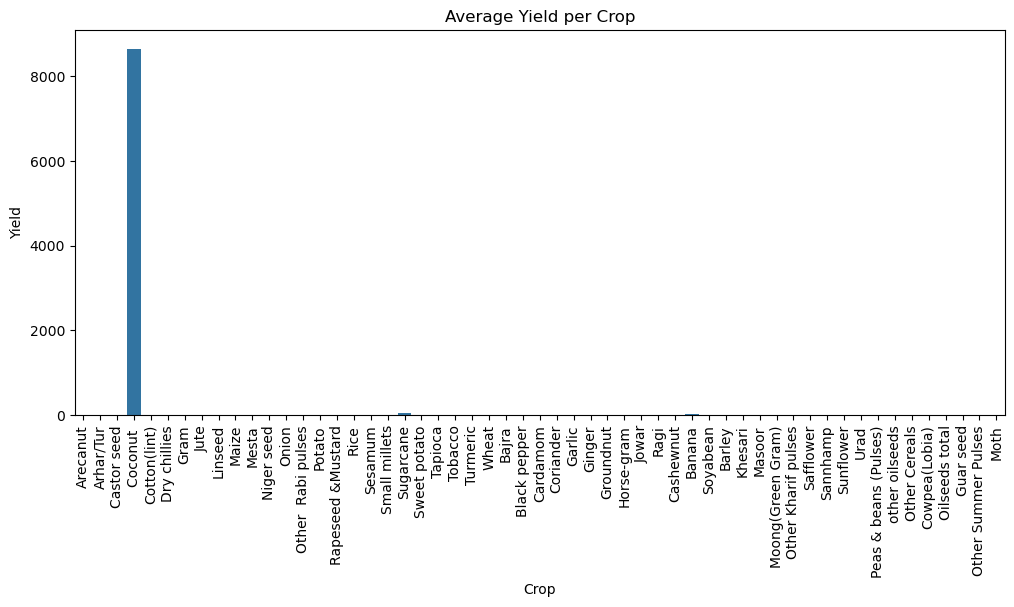

In [286]:
plt.figure(figsize=(12, 5))
sns.barplot(data=crop_df, x='Crop', y='Yield', estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Yield per Crop")
plt.show()


###  State-wise Yield

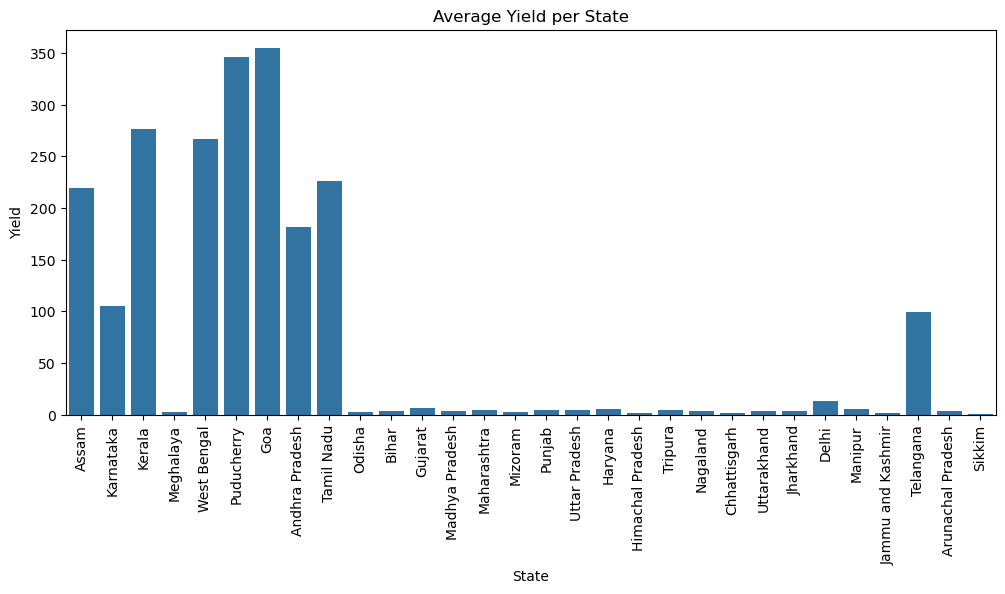

In [288]:
plt.figure(figsize=(12, 5))
sns.barplot(data=crop_df, x='State', y='Yield', estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Yield per State")
plt.show()


### Fertilizer vs Yield (Scatter)

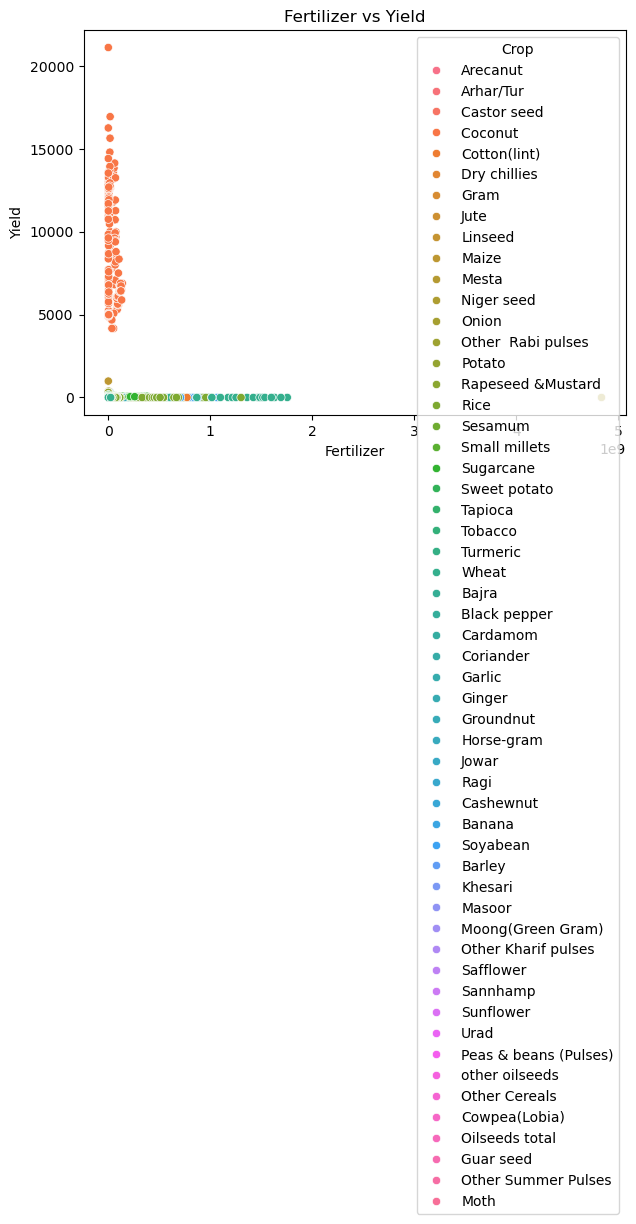

In [290]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=crop_df, x='Fertilizer', y='Yield', hue='Crop')
plt.title("Fertilizer vs Yield")
plt.show()


### Rainfall vs Yield (Scatter)

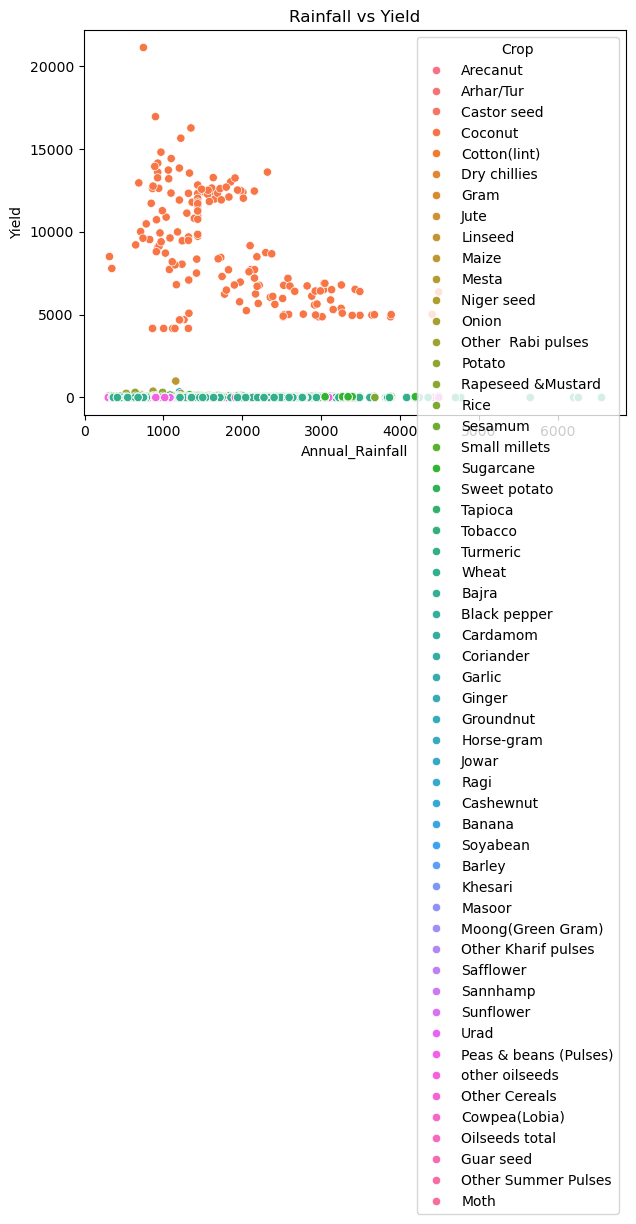

In [292]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=crop_df, x='Annual_Rainfall', y='Yield', hue='Crop')
plt.title("Rainfall vs Yield")
plt.show()


### Pairplot of Numerical Features

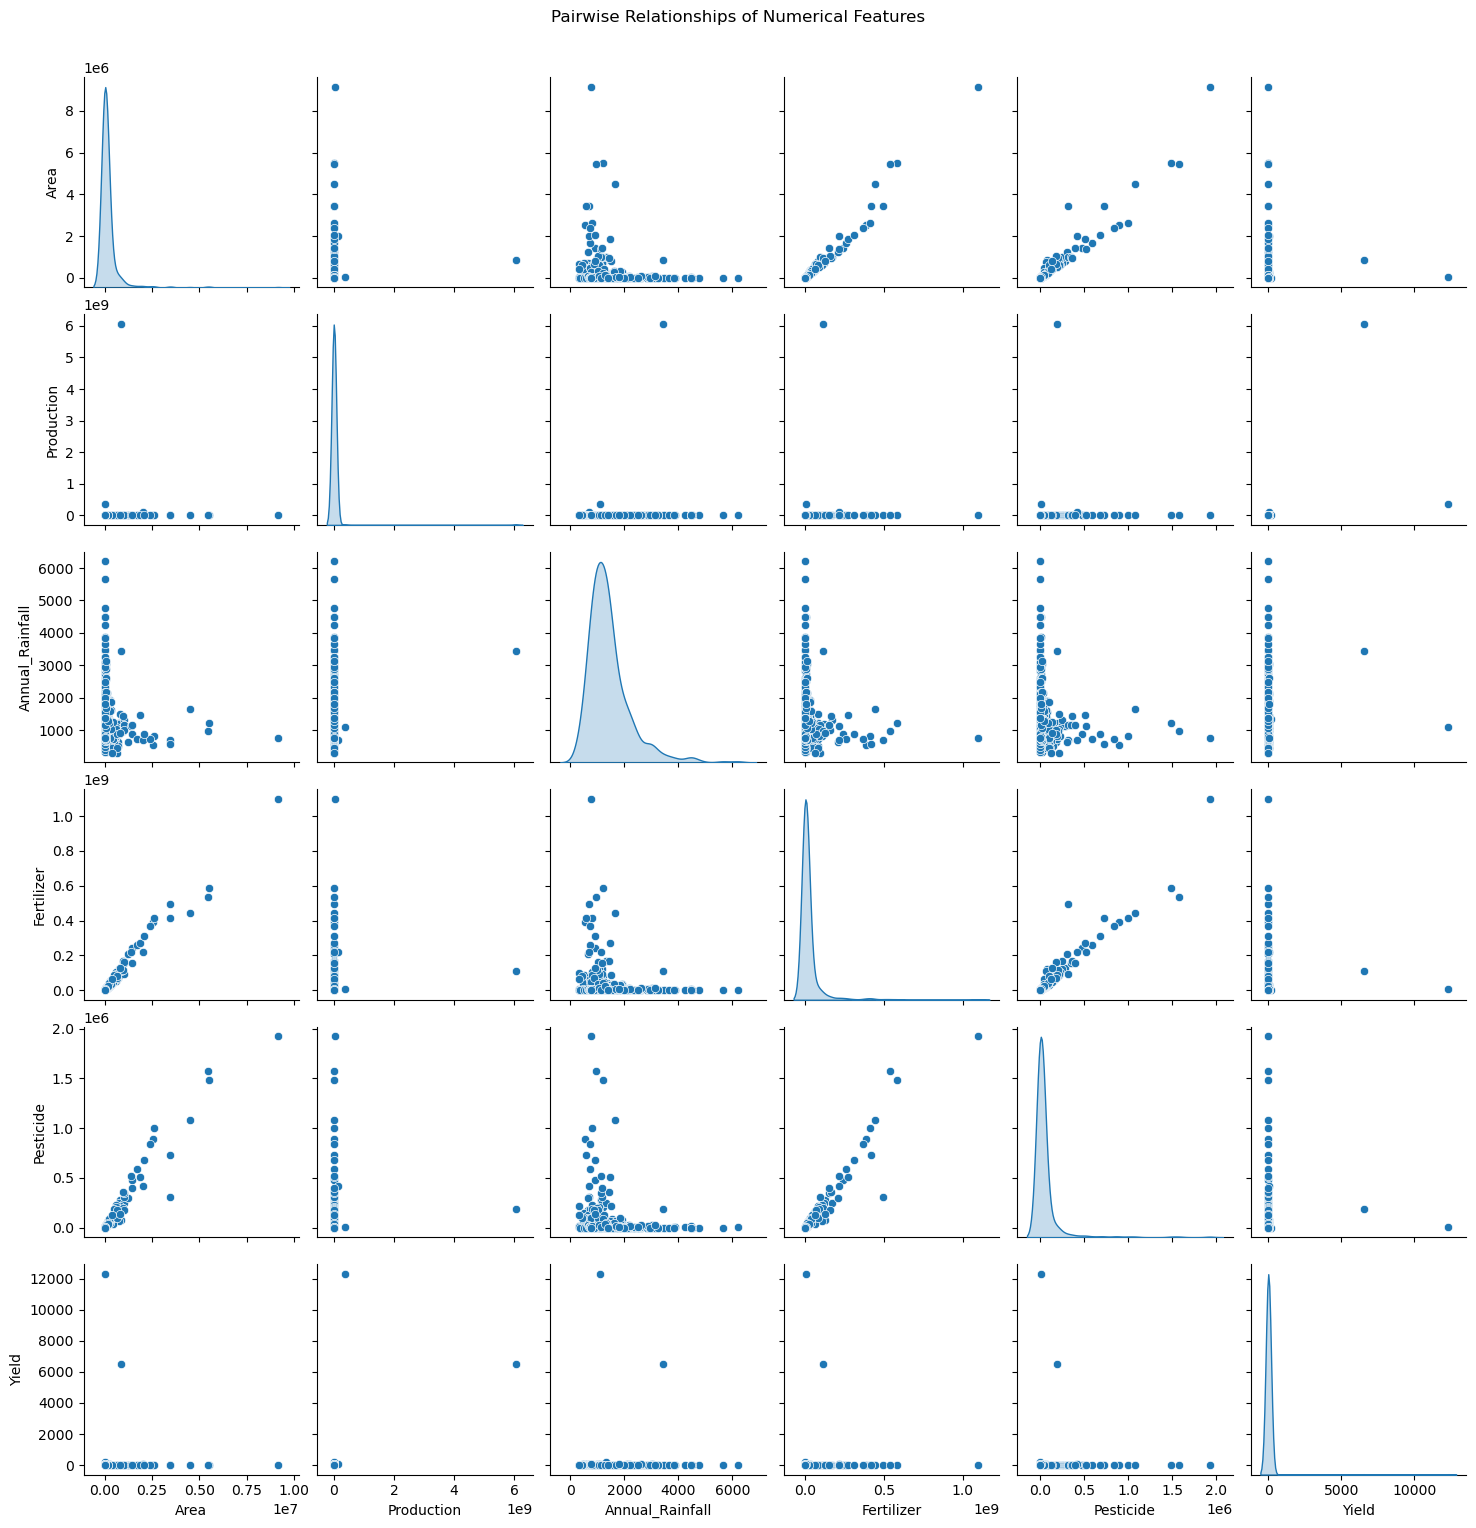

In [294]:
# Selecting only relevant numerical columns for EDA
numerical_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Sample to prevent kernel from freezing (optional for large datasets)
sample_df = crop_df[numerical_cols].sample(500, random_state=42)

# Plot pairwise relationships
sns.pairplot(sample_df, diag_kind="kde")  # KDE for smooth distributions
plt.suptitle("Pairwise Relationships of Numerical Features", y=1.02)
plt.show()

### Split the Data into X & Y

In [296]:
# Define the target variable
Y = crop_df['Yield'] 

# Drop target from features
X = crop_df.drop(columns=['Yield'])

### Display shapes of X and Y

In [298]:
print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (19689, 9)
Y shape: (19689,)


#### Observation: Shape of Feature Matrix (X) and Target Vector (y)
* X shape: (19689, 9):
This indicates that the feature matrix X contains 19,689 rows (data samples) and 9 columns (features). These features will be used as input variables for training the model.

* y shape: (19689,):
The target vector y contains 19,689 values, each corresponding to the yield of a crop. This is the dependent variable the model aims to predict.

* The shapes confirm that the data is correctly prepared for machine learning, with each input sample having a corresponding target value.

### Handle categorical variables

In [301]:
crop_df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [302]:
# Creating 2 variables: 1. Numerical values, 2. Categorical values
numeric_cols = [
    "Crop_Year", "Area","Production","Annual_Rainfall","Fertilizer","Pesticide"]
categorical_cols = ["Crop", "Season","State"]

In [303]:
# Coverting Categorical data to Numerical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ],
    remainder="passthrough"
)

X_transformed = preprocessor.fit_transform(X)

#### Observation:
* Before training a model, converted the categorical variables like "Crop", "Season", and "State" into numerical form using One-Hot Encoding

##  Train-Test Split

In [306]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (15751, 94)
X_test shape: (3938, 94)


#### Observation:

### Correlation Heatmap

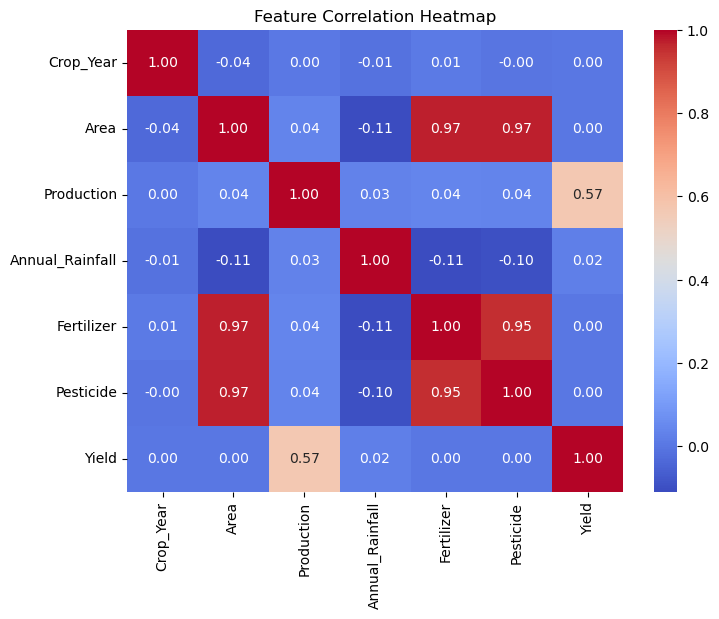

In [309]:
# Select only numerical columns (dropping categorical ones)
numeric_df = crop_df.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Observation:
* Production is likely to be highly correlated with Area because more area often results in more production.

* Yield = Production / Area, so including all three (Yield, Area, Production) can create redundancy.

In [311]:
# Droping Production as it's highly correlated with Area
X = crop_df.drop(['Production'], axis=1)
y = crop_df['Yield']

## Train a Linear Regression Model

In [313]:
# Initialize and train model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

### # Predict test data

In [315]:
Y_pred = lr.predict(X_test)

In [316]:
Y_pred

array([ 12.3341827 ,   0.95934455,  -8.71439582, ..., 142.66871554,
        15.86102296,  23.25518461])

## Evaluate the model

In [318]:
mae = mean_absolute_error(Y_test,Y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(Y_test,Y_pred)
print(f"R-Square Score: {r2}")

Mean Absolute Error: 62.98014604822282
Mean Squared Error: 158461.95448003316
Root Mean Squared Error: 398.0728004775423
R-Square Score: 0.802229068447321


#### Observation: Model Evaluation Observations
✅ R-Square Score: 0.80

This indicates that the model explains 80% of the variance in the target variable (Yield), which suggests a good fit.

The model is capturing most of the important patterns in the data.

📉 Mean Absolute Error (MAE): 62.98

On average, the model's predictions are off by about 63 units of yield.

This gives a good real-world sense of how much the model typically deviates from actual values.

🔁 Mean Squared Error (MSE): 158,461.95 and RMSE: 398.07

RMSE penalizes larger errors more than MAE and shows that larger deviations can occur.

RMSE of 398 suggests there are some predictions that are significantly far from actual values.



### Visualize Actual vs Predicted Graph

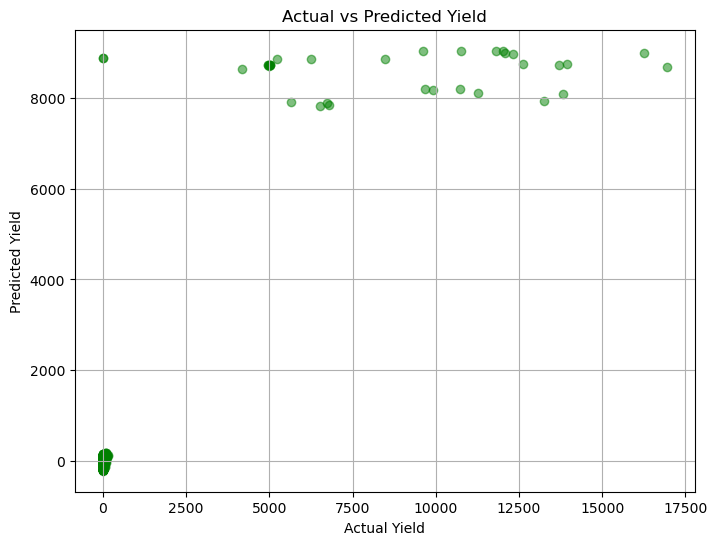

In [321]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.grid(True)
plt.show()


## Tunning The Model

In [323]:
lr = LinearRegression()
cv_scores= cross_val_score(lr, X_train, Y_train, cv = 5, scoring = 'r2')
print(f"Linear Regression: Mean R2 = {cv_scores.mean():2f}, Std Dev = {cv_scores.std():2f}")

Linear Regression: Mean R2 = 0.851616, Std Dev = 0.026554


#### Observation: Cross-Validation Performance of Linear Regression
* The 5-fold cross-validation of the Linear Regression model resulted in a mean R² score of approximately 0.85 (85.16%), which indicates that the model explains about 85% of the variance in the target variable across different subsets of the training data.

* The standard deviation of 0.0265 is quite low, suggesting that the model's performance is consistent and stable across all folds. This implies that the model is generalizing well and is not overly sensitive to the specific training/validation split.

* Overall, the model shows strong predictive power and robustness with Linear Regression.

### Performing Lasso Tunning Method

In [326]:
lasso_params = {
    "alpha": [0.01,0.05,0.1,0.5,1,5,10]
}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring ='r2')
lasso_cv.fit(X_train, Y_train)
best_lasso_model = lasso_cv.best_estimator_
best_lasso_score = lasso_cv.best_score_
print(f"Best Lasso Model: Alpha = {lasso_cv.best_params_['alpha']}")
print(f"Best Lasso R2 score: Alpha = {best_lasso_score:.2f}")

Best Lasso Model: Alpha = 0.01
Best Lasso R2 score: Alpha = 0.85


#### Observation: Lasso Regression Performance
* Lasso Regression was applied to the dataset with hyperparameter tuning, and the best model was achieved at alpha = 0.01, yielding an R² score of 0.85.

* This means the Lasso model explains 85% of the variance in the target variable, which is comparable to standard Linear Regression. Since Lasso also performs feature selection by penalizing less important features, it offers the added benefit of simplifying the model and reducing the risk of overfitting.

* Lasso Regression provides a well-regularized model with strong predictive power and reduced complexity.

### Performing Lasso Tunning Method

In [329]:
ridge_params = {
    "alpha":[0.01,0.05,0.1,0.5,1,5,10]
}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2")
ridge_cv.fit(X_train, Y_train)
best_ridge_model = ridge_cv.best_estimator_
best_ridge_score = ridge_cv.best_score_
print(f"Best Ridge Model: Alpha = {ridge_cv.best_params_['alpha']}")
print(f"Best Ridge R2 Score: Alpha = {best_ridge_score:.2f}")

Best Ridge Model: Alpha = 0.1
Best Ridge R2 Score: Alpha = 0.85


#### Observation: Ridge Regression Performance
* After tuning the Ridge Regression model, the best performance was achieved with alpha = 0.1, which controls the regularization strength. The model yielded an R² score of 0.85, matching the performance of the standard Linear Regression model.

* This suggests that:

- The dataset likely does not suffer from multicollinearity or overfitting, as regularization did not significantly improve or worsen the performance.

* Ridge regression with low regularization (α=0.1) maintained strong predictive accuracy while slightly penalizing model complexity.
  
* Ridge regression proves to be a robust alternative to linear regression, offering similar accuracy with added control over potential overfitting.

### Conclusion:
* The objective of this project was to predict crop yield based on multiple agricultural and environmental features such as crop type, season, area, rainfall, fertilizer, and pesticide usage.

* After performing thorough Exploratory Data Analysis (EDA) and applying various regression techniques, the Linear Regression model achieved an R² score of 0.80 on the test data, indicating a strong ability to explain the variance in crop yield.

* To validate and enhance performance, cross-validation was performed, and the model yielded a mean R² of 0.85 with low standard deviation, demonstrating consistent performance across different folds of data.

* Additionally, Ridge Regression was applied to address potential multicollinearity and overfitting. The best result was obtained with alpha = 0.1, maintaining a strong R² score of 0.85.



### Key Takeaways
* The model is well-generalized, with consistent accuracy across training and validation data.

* No significant overfitting was observed.

* Regularization techniques like Ridge did not drastically improve performance, suggesting the model was already optimized.

### Business Impact
* This predictive model can assist stakeholders and policymakers in:

* Forecasting crop yields

* Optimizing resource allocation (fertilizer, pesticide, etc.)

* Planning seasonal crop strategies

* Overall, the model provides valuable insights for data-driven agricultural decision-making.